In [50]:
from tensorflow.keras import datasets, utils, layers, models, optimizers
from tensorflow.keras.models import load_model
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# location to cache the model weights
model_file = "weights/2_cnn_model_weights.h5"

NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES) 
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [51]:
# Q: what are filters?
# A: They are a matrix transformation used to extract features like edges (see next block for display).
#    filters or these transformation matrices are also called "convolutional window" => cnn!

# Q: what does the transformation matrix (filter) actually look like? what is it doing to the values?
# A: See block 2 below

# Q: if 10 filters are defined here, how are the specific "transformations" used set? 
# A: In a CNN, the specific values of the filters are usually initialized randomly and then learned during the training process. 
#    The network adjusts the filter values to minimize the loss function, effectively learning the most useful features for the task at hand.

# Q: what is kernel size?
# A: Kernel size is the dimension of the filter matrix used in the convolution operation. 
#    In the code, kernel_size = (4, 4) for conv_layer_1 and kernel_size = (3, 3) for conv_layer_2, which means the first convolutional layer uses 4x4 filters, and the second layer uses 3x3 filters.

# Q: stride?
# A: Stride refers to the number of pixels by which the filter matrix moves over the input image. 
#    A stride of 2, as used in the code for both convolutional layers (strides = 2), means the filter jumps two pixels at a time as it moves across the image.
#    Results in a smaller (in pixel size) of the output image

# Q: padding?
# A: Adding extra pixels around the border of the input image. This is done to control the spatial size of the output feature map. In the code, padding = 'same' indicates that padding is applied to the input such that the output feature map has the same width and height as the input.
#    See block 2 and 3 for reference on how no padding gives a smaller sized output image 

# Q: why have 2 convolutional layers and not 1? why not 100 or some other number?

"""
# original cnn (w/o batch norm and dropout)
# this one produced ~50% accuracy about the same as a dense layer

input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
    filters = 10, 
    kernel_size = (4,4), 
    strides = 2, 
    padding = 'same'
    )(input_layer)
conv_layer_2 = layers.Conv2D(
    filters = 20, 
    kernel_size = (3,3), 
    strides = 2, 
    padding = 'same'
    )(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation = 'softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)
"""

# Q: why break out the activation functions here and instead of putting it as an input value?
# model = models.Sequential([
#     layers.Flatten(input_shape=(32, 32, 3)),
#     layers.Dense(200, activation = 'relu'),
#     layers.Dense(150, activation = 'relu'),
#     layers.Dense(10, activation = 'softmax'),
# ])

# Q: What does batch norm layer do? 

# Q: what is the specific math formula for batch norm?

# Q: What does dropout layer do?
# A: dropout has neurons that are randomly "deactivated" e.g. outputs nothing. 
#    it adds noise (turns off certain neurons or groups of neurons) to help it better generalize and not over depend on any specific features to do the final job

# Q: Why is batch norm after each layer but dropout is only at the end?
# A: Dropout is usually applied after activation and after layers prone to overfitting. 
#    At the end is "usually" where overfitting occurs most often, but can be in sub layers as well.
#    
#    Batch ...
   
input_layer = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters = 32, kernel_size = 3
   , strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

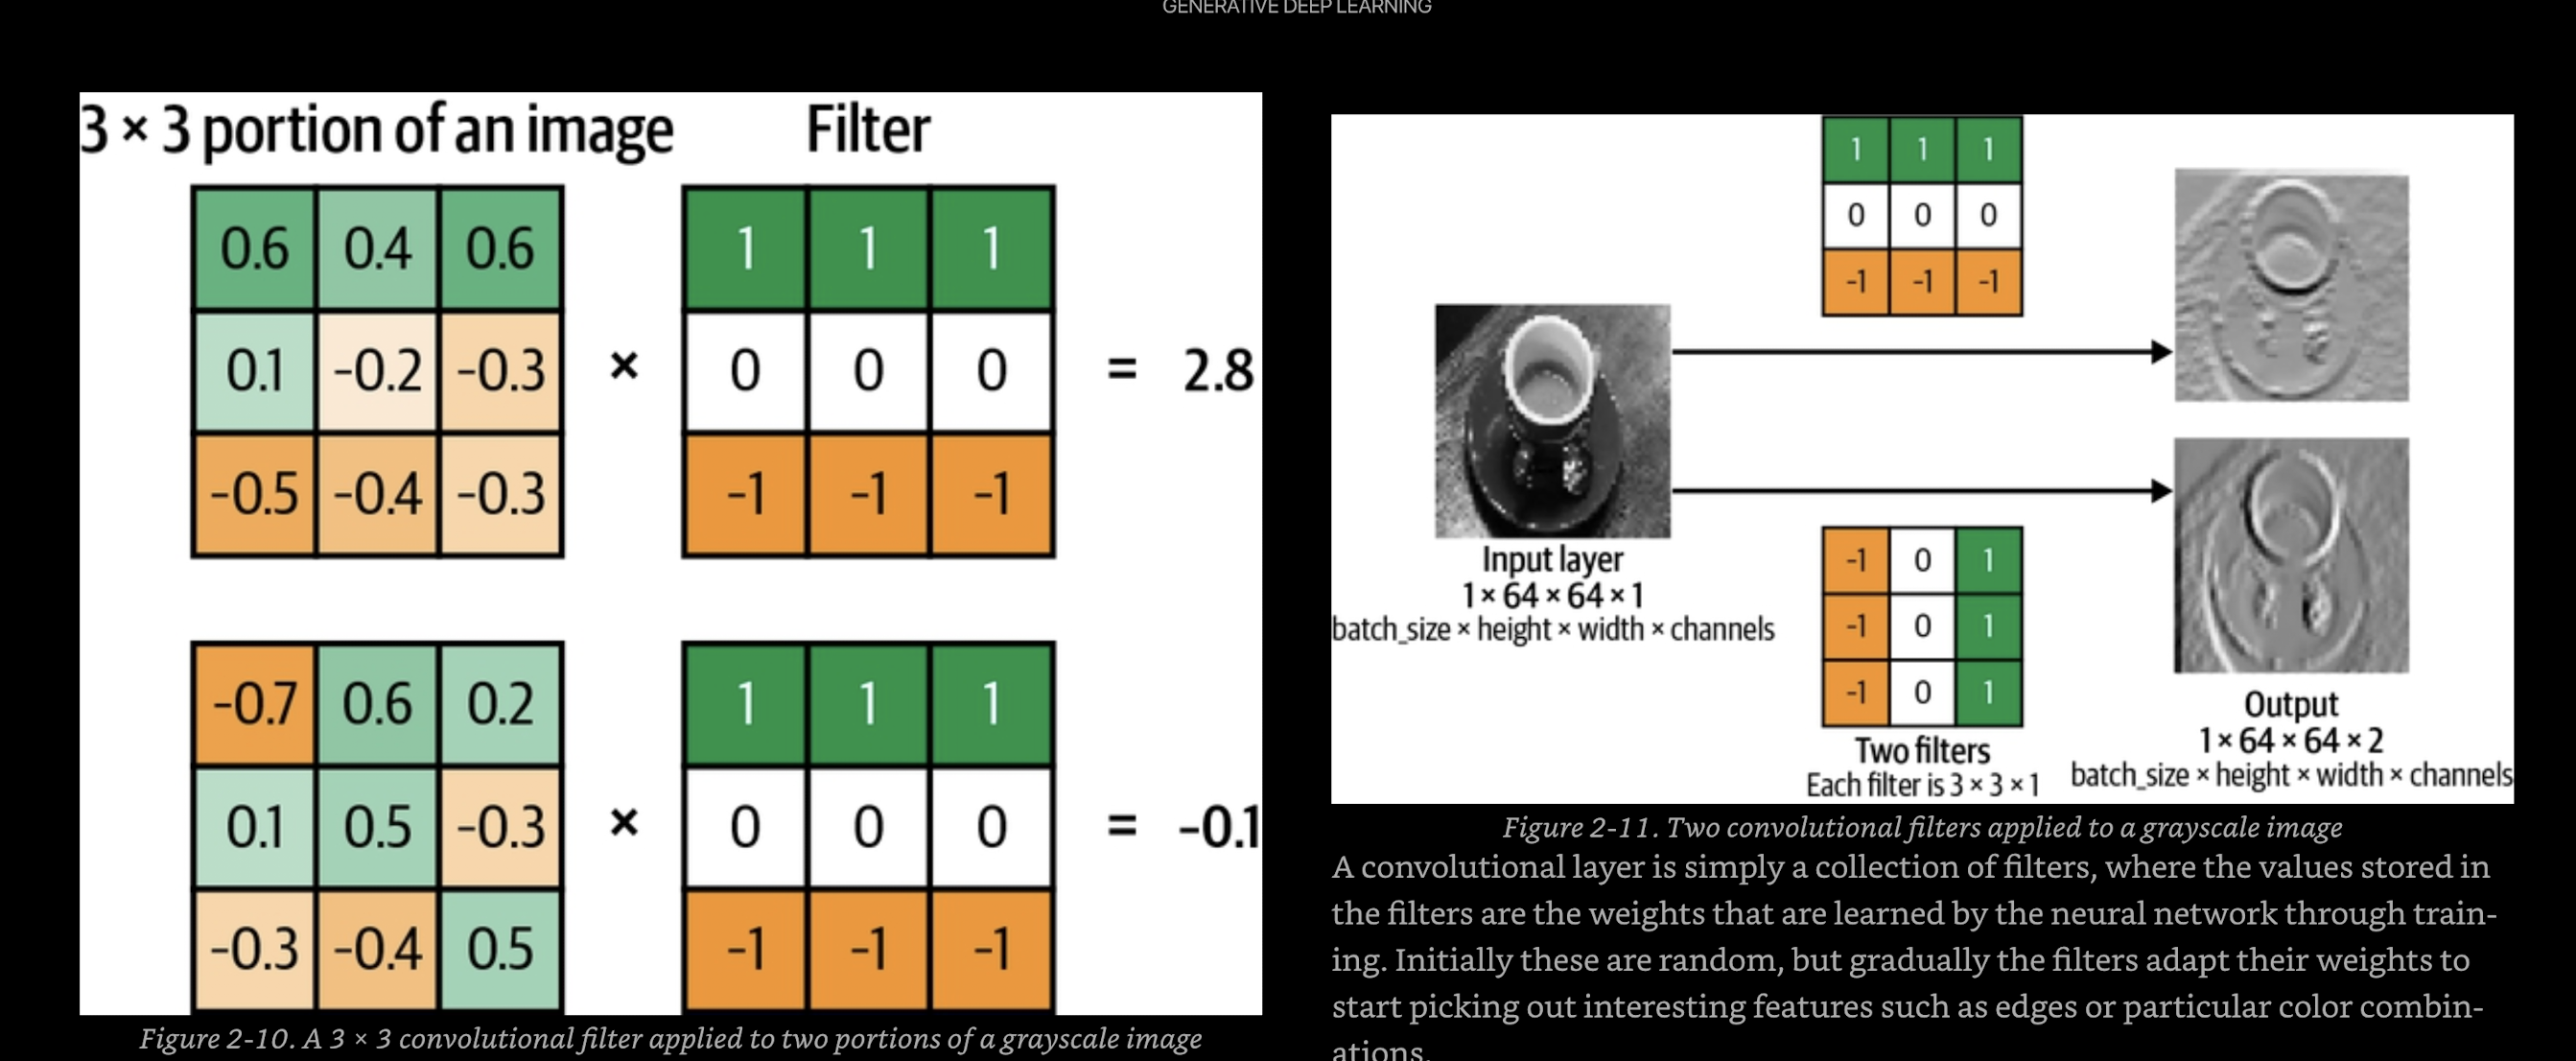

In [52]:
# Q: what's the math operation thats being done for convolution transformation?
# A: it's not a matrix multiplication or dot product actually, it is an "element wise" multiplication then sum of all the products.
#    "element wise" means a1 x b1 then a2 x b2 where a is the values in the original matrix and b are the values in the filter
#    e.g. (0.6 * 1) + (0.4 * 1) + ... => 2.8
#    then, 2.8 becomes a new pixel in the output image
Image(filename='images/cnn_filters.png', width=500)

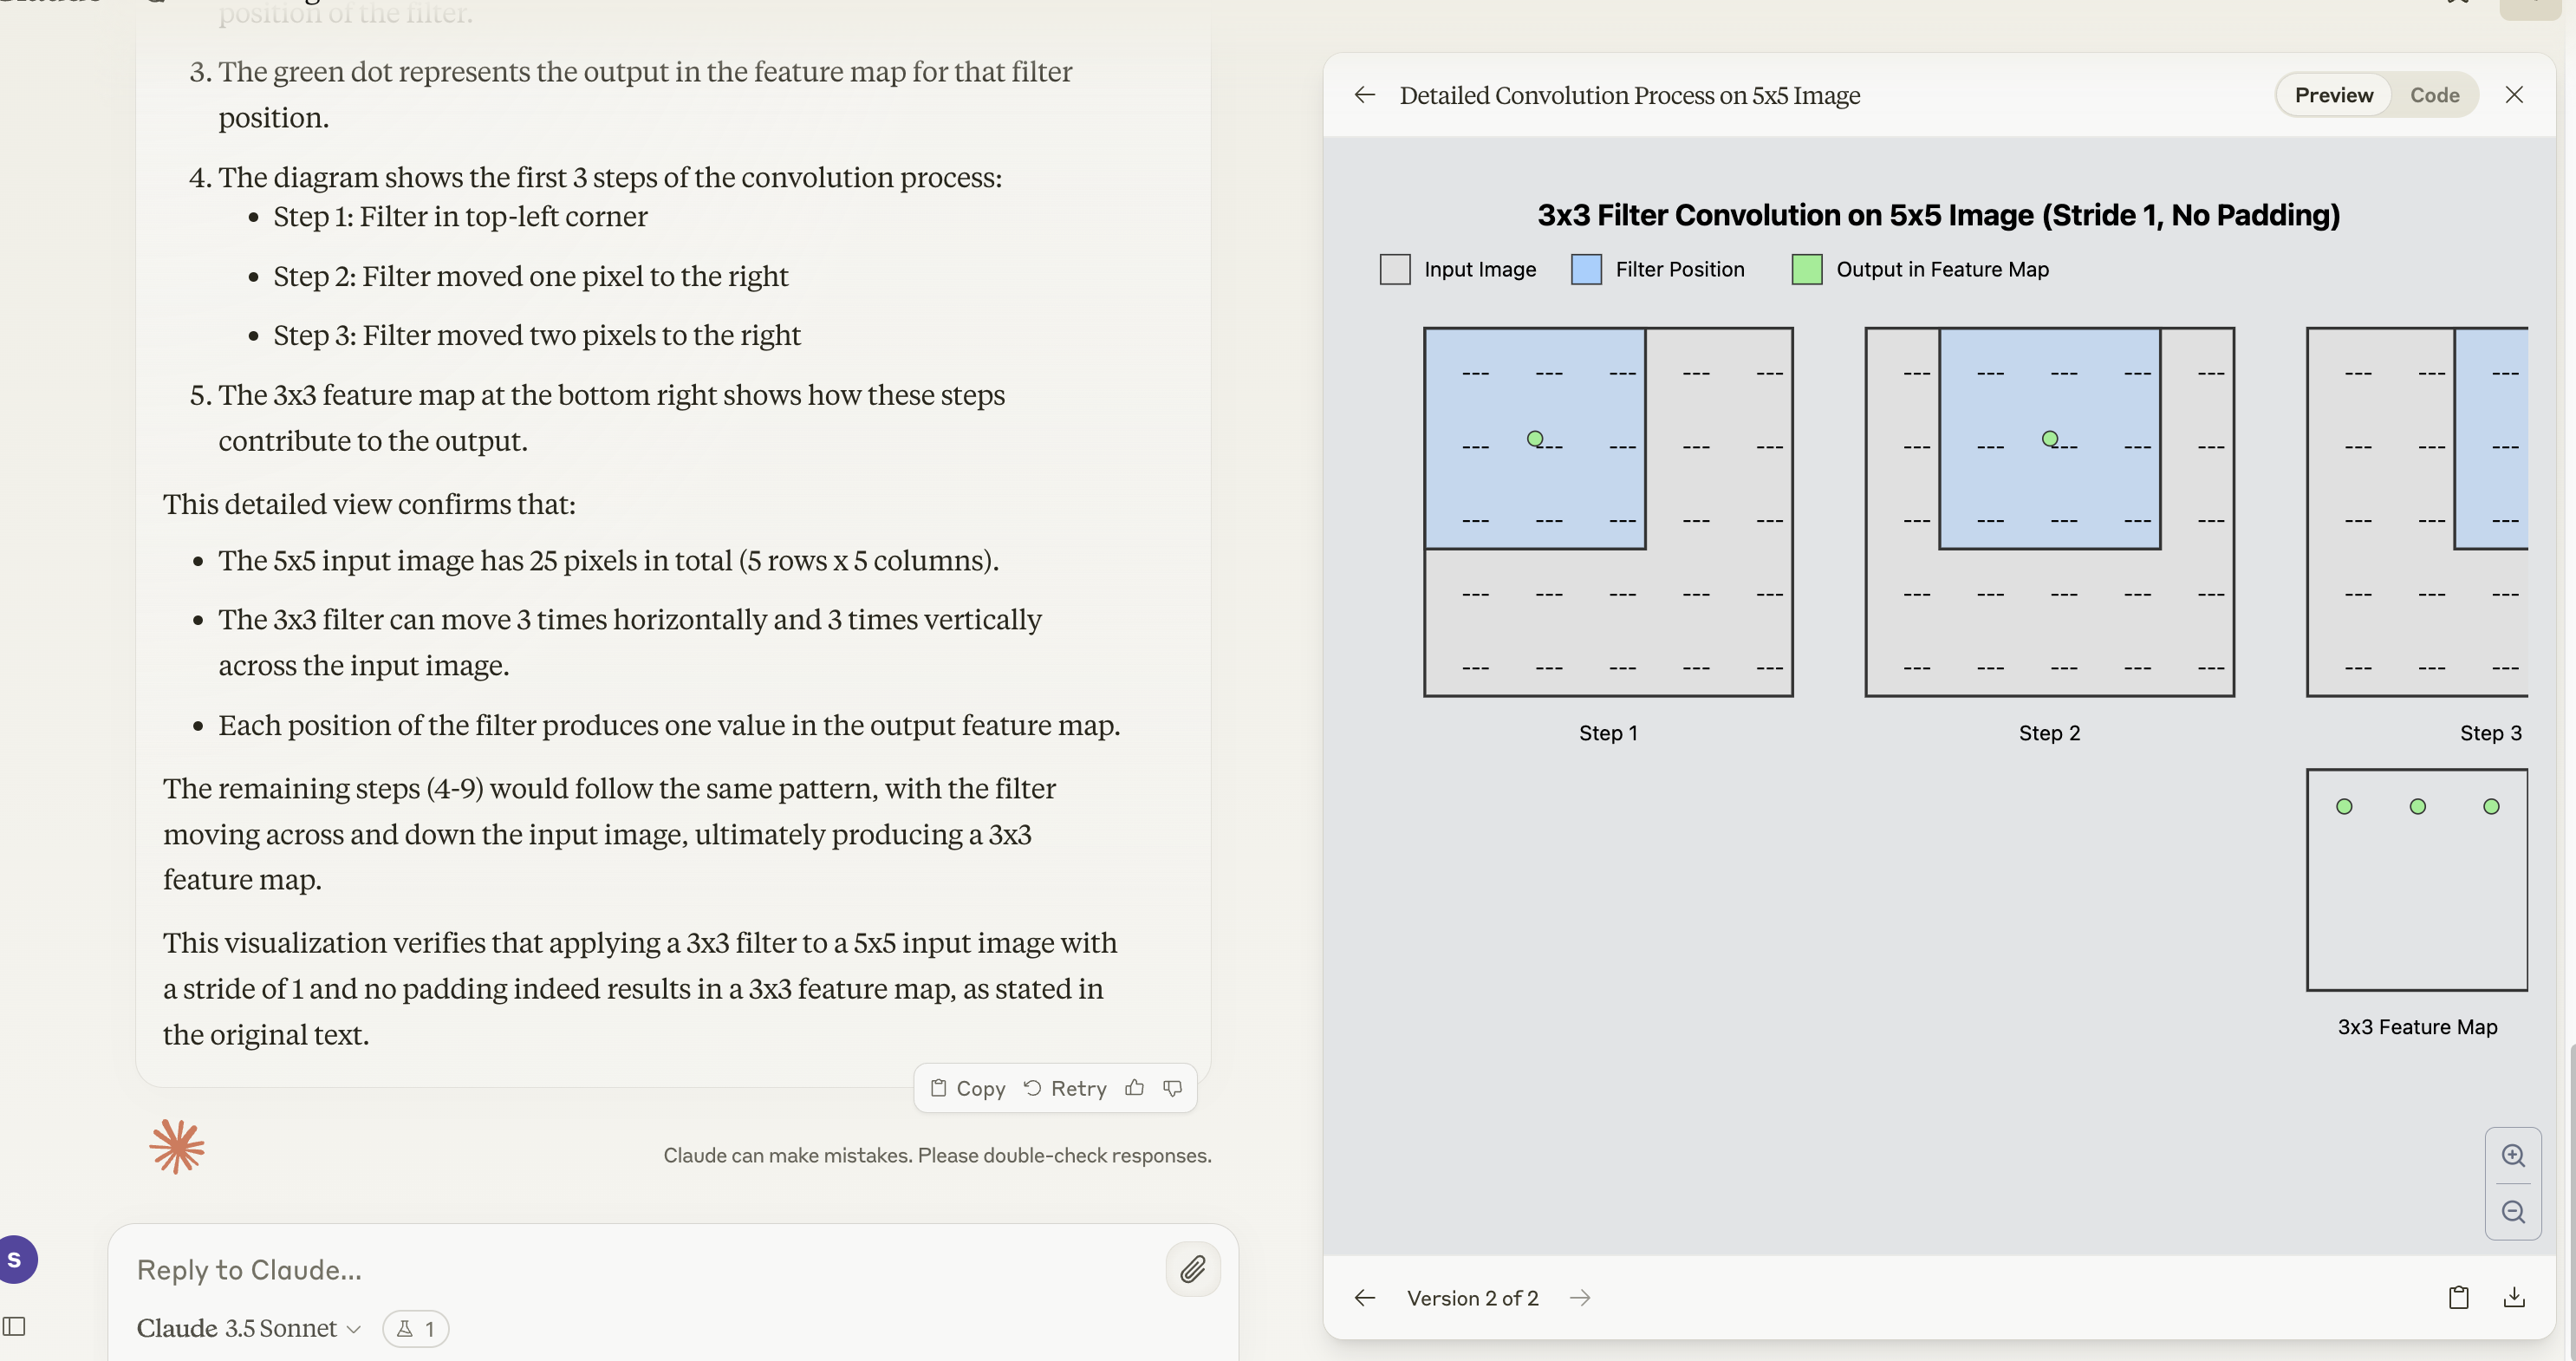

In [53]:
# Q: if I have a 5x5 image using a 3x3 filter with no padding (and not special strides) whats the size of the output image?
# A: I honestly couldn't visualize this properly in my head so I got claude to draw it. From the drawing I can see it goes 3 times right
#    and 3 times down. So a 3x3 image is produced.

Image(filename='images/claude_convolution_over_px_p1.png', width=500)
# Image(filename='images/claude_convolution_over_px_p2.png', width=500)

In [54]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [55]:
# amount to adjust the weights during each step (gradient descent)
opt = optimizers.Adam(learning_rate=0.0005)

# loss function: categorical_crossentropy, root mean squared etc
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [56]:
# cnn with batch norm and dropout achieves ~80% accuracy!!

if os.path.exists(model_file):
    # Load the pre-trained model
    model = load_model(model_file)
    print("Loaded saved model from disk.")
else:
    # Train the model because it hasn't been trained yet
    print("Training the model...")
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)
    
    # Save the model for future use
    model.save(model_file)
    print(f"Model saved to {model_file}.")

Training the model...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3858 - loss: 1.7947
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6021 - loss: 1.1458
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6568 - loss: 0.9802
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6832 - loss: 0.9021
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7070 - loss: 0.8398
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7333 - loss: 0.7719
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7427 - loss: 0.7374
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7565 - loss: 0.6986
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7701 - loss: 0.6561
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7799 - loss: 0.6296


Model saved to weights/ch_2_cnn_model_weights_new.h5.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


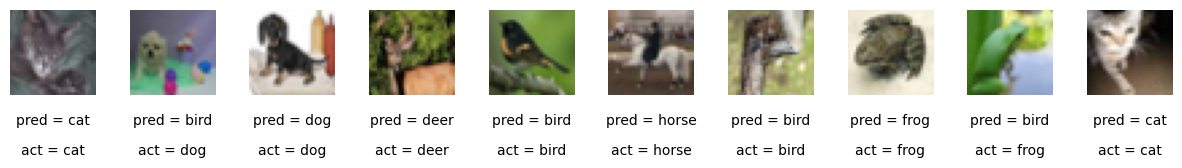

In [57]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

# Q: whats the output of predict look like?
preds = model.predict(x_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)